# NGC 3201 Analysis - optical data

In [3]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
%matplotlib inline 

In [4]:
target = 'NGC6121'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '16:23:35.22'
cluster_dec = '-26:31:32.7'

# Variable stars

In [ ]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

# Period Search

### Read in variables from Clement catalog

In [4]:
dtype1 = np.dtype([('id', 'S10'), ('period', float)])
data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))

datasets, colors = optical.compile_datasets(folder, old=0, returnColors=True)



Datasets:

     Y0701  95202 2007-01-13 2007-01-23 k
    lcogt2  69985 2013-03-14 2013-03-23 r
     Y0704  24334 2007-03-31 2007-04-13 b
    zingle  15701 1996-04-16 1996-04-19 g
      lee4  11616 2012-02-18 2012-02-23 m
     west1  11444 2005-02-11 2005-02-13 c
     wfi13  10623 2003-06-04 2003-06-06 xkcd:brown
    lcogt3   9918 2014-03-02 2014-03-02 xkcd:coral
    ct1204   8009 2012-04-24 2012-04-24 xkcd:purple
  efosc08a   7693 2008-04-19 2008-04-19 xkcd:maroon
     bond6   7436 1998-04-17 1998-04-22 xkcd:olive
      wfi6   6815 2002-02-20 2002-02-20 xkcd:tan
     B1201   6727 2012-01-06 2012-01-11 xkcd:grey
     wfi22   5403 2000-02-27 2000-02-27 xkcd:teal
efosc1101b   5379 2011-01-21 2011-01-21 xkcd:tomato
      lee2   5052 2011-05-30 2011-06-03 xkcd:orchid
     wfi41   4855 2012-02-24 2012-02-27 xkcd:goldenrod
     wfi11   4648 1999-12-05 1999-12-05 xkcd:orange
     west2   4238 2005-05-05 2005-05-05 xkcd:khaki
     dec97   3928 1997-12-25 1997-12-25 xkcd:darkgreen
  emmi0601  

V10 0.5352


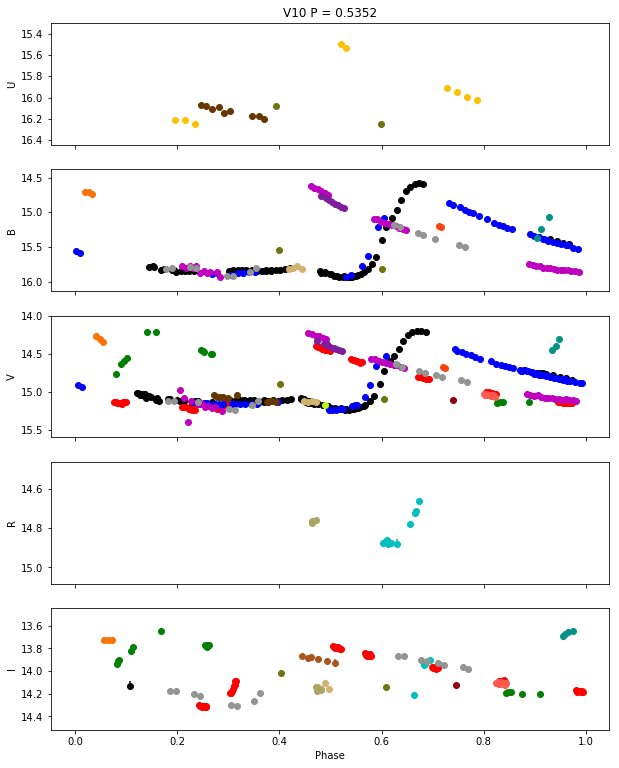

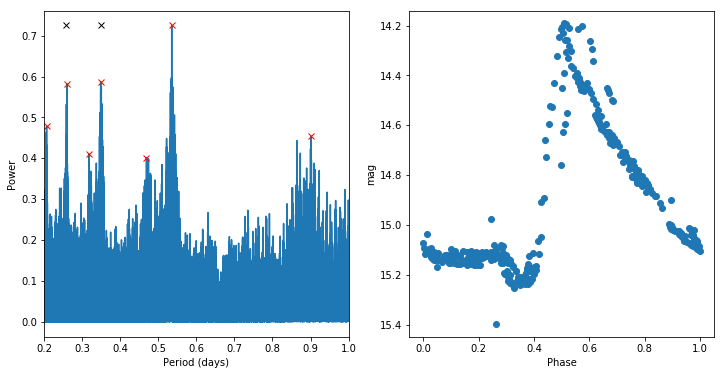

0.535169086682


In [5]:
### For single star
ind=9
print data['id'][ind], data['period'][ind]
lcv = data['id'][ind]
initial_period = data['period'][ind]
lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'

U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, initial_period, lcv, datasets, error_threshold=0.05, colors=colors)

# broad Lomb Scargle
new_guess = lightcurves.period_search_LS(V, lcv)
print new_guess

Star  Period  Period_new
V10 0.5352 0.535164786682


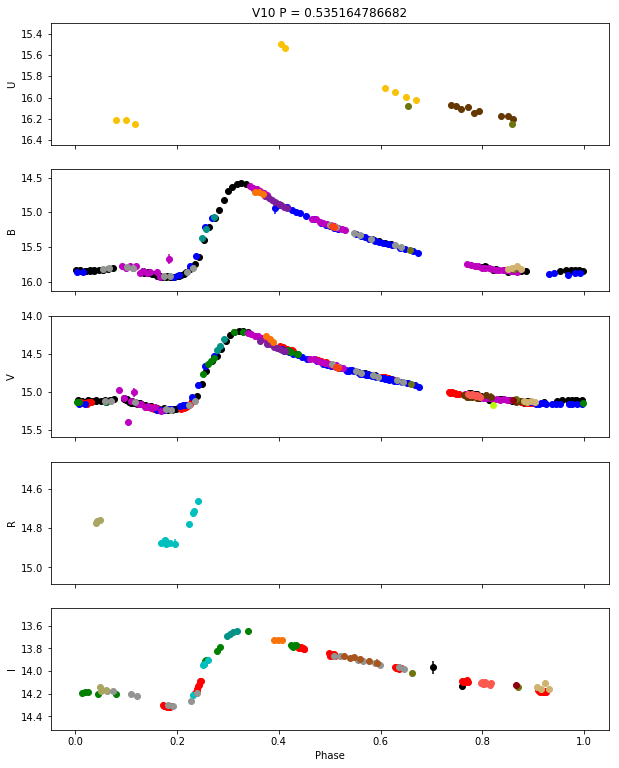

In [9]:
period = lightcurves.period_search(V, new_guess, lcv, second_band=B, search_window=0.00005)
print 'Star  Period  Period_new'
print lcv, initial_period, period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, error_threshold=0.1, colors=colors)


# Search for other variable candidates

In [14]:
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
catalog_data, dist = optical.read_fnl_w_radial_dist(optical_dir, target, center_ra, center_dec)

#dtype1 = np.dtype([('id', 'S8'), ('period', float), ('var_type', 'S5')])
dtype1 = np.dtype([('id', 'S8'), ('ra', 'S13'), ('dec', 'S13')])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,9,10))

Reading optical catalog for NGC3201...
Finished reading optical catalog.


Datasets:

     Y0701  95202 2007-01-13 2007-01-23 k
    lcogt2  69985 2013-03-14 2013-03-23 r
     Y0704  24334 2007-03-31 2007-04-13 b
    zingle  15701 1996-04-16 1996-04-19 g
      lee4  11616 2012-02-18 2012-02-23 m
     west1  11444 2005-02-11 2005-02-13 c
     wfi13  10623 2003-06-04 2003-06-06 xkcd:brown
    lcogt3   9918 2014-03-02 2014-03-02 xkcd:coral
    ct1204   8009 2012-04-24 2012-04-24 xkcd:purple
  efosc08a   7693 2008-04-19 2008-04-19 xkcd:maroon
     bond6   7436 1998-04-17 1998-04-22 xkcd:olive
      wfi6   6815 2002-02-20 2002-02-20 xkcd:tan
     B1201   6727 2012-01-06 2012-01-11 xkcd:grey
     wfi22   5403 2000-02-27 2000-02-27 xkcd:teal
efosc1101b   5379 2011-01-21 2011-01-21 xkcd:tomato
      lee2   5052 2011-05-30 2011-06-03 xkcd:orchid
     wfi41   4855 2012-02-24 2012-02-27 xkcd:goldenrod
     wfi11   4648 1999-12-05 1999-12-05 xkcd:orange
     west2   4238 2005-05-05 2005-05-05 xkcd:

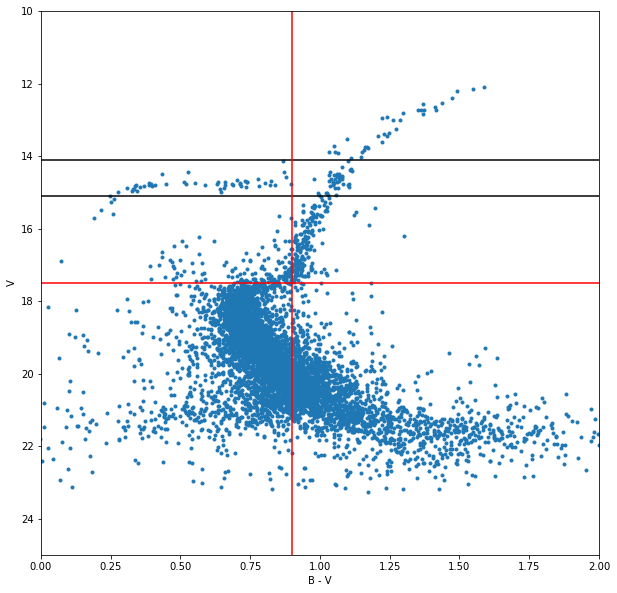

In [18]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')
# Define HB
HB_lower = 15.1
HB_upper = 14.1
mp.axhline(HB_lower, color='k')
mp.axhline(HB_upper, color='k')
#Define GB
GB_red = 0.9
GB_lower = 17.5
mp.axvline(GB_red, color='r')
mp.axhline(GB_lower, color='r')

88 candidate RRL stars.
123 candidate variables on GB.
386 other candidate variables.


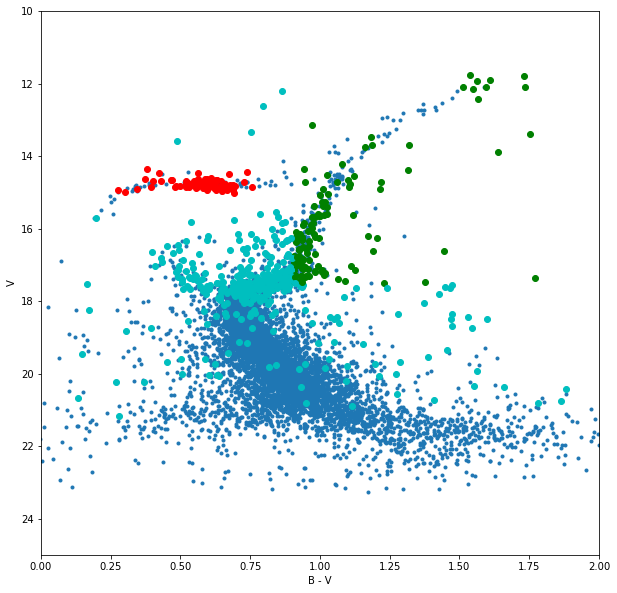

In [19]:
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= HB_lower and mag_var >= HB_upper and color_var <= GB_red):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= GB_lower and color_var >= GB_red):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

RRL_candidates = data['id'][type_var == 'RRL']
print str(len(RRL_candidates))+' candidate RRL stars.'
GB_variables = data['id'][type_var == 'GB']
print str(len(GB_variables))+' candidate variables on GB.'
other_variables = data['id'][type_var == 'OTH']
print str(len(other_variables))+' other candidate variables.'

In [ ]:
for ind, star in enumerate(other_variables):
    print ind, star, data['ra'][data['id'] == star], data['dec'][data['id'] == star]

In [ ]:
ind = 24
lcv_name = other_variables[ind]
#lcv_name = RRL_candidates[ind]
#lcv_name = 'V60'
lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
#print lcv_name, data['var_type'][ind], data['period'][ind]
#cc_period = data['period'][ind]
print lcv_name

In [ ]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')


color_var = np.mean(B[0]) - np.mean(V[0])
mag_var = np.mean(V[0])
mp.plot(color_var, mag_var, 'ro')
mp.show()

# remove data with large error bars
error_threshold = 0.1
V[0][V[1] > error_threshold] = np.nan
V[1][V[1] > error_threshold] = np.nan

lightcurves.plot_raw_optical_lcv(V)

# Find best dataset to use
sources_prefix = np.zeros(len(V[3]), dtype='S30')
for ind, string in enumerate(V[3]):
    sources_prefix[ind] = string.split(':')[0]
sources, counts = np.unique(sources_prefix, return_counts=True)
best_source = sources[counts == np.max(counts)]

num_obs_in_run = len(V[0][sources_prefix == best_source])
longest_dataset = np.zeros((4, num_obs_in_run), dtype=object)
longest_dataset[0][:] = V[0][sources_prefix == best_source]
longest_dataset[1][:] = V[1][sources_prefix == best_source]
longest_dataset[2][:] = V[2][sources_prefix == best_source]
longest_dataset[3][:] = V[3][sources_prefix == best_source]

lightcurves.plot_raw_optical_lcv(longest_dataset)


# find night with the most data

obs_times = np.array(longest_dataset[2], dtype=float)
nights = np.round(obs_times, 0)
uniq_nights, counts = np.unique(nights, return_counts=True)
order = np.argsort(counts)
best_nights = uniq_nights[order]
best_night = uniq_nights[counts == np.max(counts)][0]
num_obs_in_night = len(V[2][nights == best_night])

longest_night = np.zeros((4, num_obs_in_night), dtype=object)
longest_night[0][:] = longest_dataset[0][nights == best_night]
longest_night[1][:] = longest_dataset[1][nights == best_night]
longest_night[2][:] = longest_dataset[2][nights == best_night]
longest_night[3][:] = longest_dataset[3][nights == best_night]


lightcurves.plot_raw_optical_lcv(longest_night)

In [ ]:
candidate_periods = variables.candidate_variables(V, lcv_name, min_period=0.1, max_period=0.9, grid_num=1000)



In [ ]:
for period in candidate_periods:
    if period == 0:
        continue
    lightcurves.plot_phased_optical_one_band(V, period, lcv_name, datasets)